In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files


# Upload the file
uploaded = files.upload()  # This opens a file dialog to upload

# Load the uploaded CSV file
X_data = pd.read_csv('vectorized_graphs1.csv')  
print(X_data.head())


Saving vectorized_graphs1.csv to vectorized_graphs1.csv
   Edge_1  Edge_2  Edge_3  Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  Edge_9  \
0       0       0       0       0       0      74      74      74       0   
1       0       0       0       0     106     114      85      85       0   
2       0       0       0       0     123     105      98      98       0   
3       0       0       0       0     137     114     114     105       0   
4       0       0       0       0     157     141     107     107       0   

   Edge_10  ...  Edge_27  Edge_28  Edge_29  Edge_30  Edge_31  Edge_32  \
0        0  ...        0       74       74       74       74       74   
1        0  ...        0       88       81       81        0       90   
2        0  ...        0        0       55       55      105       98   
3        0  ...        0      101      101       94      114      114   
4        0  ...        0        0       61       61        0      107   

   Edge_33  Edge_34  Edge_35  Edge_36  
0 

In [ ]:
# Upload the file
uploaded = files.upload()  # This opens a file dialog to upload

# Load the uploaded CSV file
Y_data = pd.read_csv('rigidity_results.csv')  # Replace with your actual filename
print(Y_data.head())

Saving rigidity_results.csv to rigidity_results.csv
   Is_Rigid
0         1
1         1
2         0
3         1
4         0


In [ ]:
# Concatenate the two DataFrames
dataset = pd.concat([X_data, Y_data], axis=1)
print(dataset.head())


   Edge_1  Edge_2  Edge_3  Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  Edge_9  \
0       0       0       0       0       0      74      74      74       0   
1       0       0       0       0     106     114      85      85       0   
2       0       0       0       0     123     105      98      98       0   
3       0       0       0       0     137     114     114     105       0   
4       0       0       0       0     157     141     107     107       0   

   Edge_10  ...  Edge_28  Edge_29  Edge_30  Edge_31  Edge_32  Edge_33  \
0        0  ...       74       74       74       74       74       74   
1        0  ...       88       81       81        0       90       90   
2        0  ...        0       55       55      105       98       98   
3        0  ...      101      101       94      114      114      105   
4        0  ...        0       61       61        0      107      107   

   Edge_34  Edge_35  Edge_36  Is_Rigid  
0       49       49       49         1  
1       58      

In [ ]:
# Normalize all columns except the last one to the range [0, 1]
for column in dataset.columns[:-1]:  # Loop through all columns except the last
    min_val = dataset[column].min()
    max_val = dataset[column].max()

    # Check if min and max are the same
    if min_val == max_val:
        dataset[column] = 0
    else:
        # Apply min-max normalization
        dataset[column] = (dataset[column] - min_val) / (max_val - min_val)

# Replace any remaining NaN values with 0
dataset = dataset.fillna(0)

# View the first few rows of the normalized data
print(dataset.head())


   Edge_1  Edge_2  Edge_3  Edge_4    Edge_5    Edge_6    Edge_7    Edge_8  \
0     0.0     0.0     0.0     0.0  0.000000  0.185930  0.184539  0.217647   
1     0.0     0.0     0.0     0.0  0.250591  0.286432  0.211970  0.250000   
2     0.0     0.0     0.0     0.0  0.290780  0.263819  0.244389  0.288235   
3     0.0     0.0     0.0     0.0  0.323877  0.286432  0.284289  0.308824   
4     0.0     0.0     0.0     0.0  0.371158  0.354271  0.266833  0.314706   

   Edge_9  Edge_10  ...   Edge_28   Edge_29   Edge_30   Edge_31   Edge_32  \
0     0.0      0.0  ...  0.190722  0.189258  0.206128  0.213256  0.209632   
1     0.0      0.0  ...  0.226804  0.207161  0.225627  0.000000  0.254958   
2     0.0      0.0  ...  0.000000  0.140665  0.153203  0.302594  0.277620   
3     0.0      0.0  ...  0.260309  0.258312  0.261838  0.328530  0.322946   
4     0.0      0.0  ...  0.000000  0.156010  0.169916  0.000000  0.303116   

    Edge_33   Edge_34   Edge_35   Edge_36  Is_Rigid  
0  0.218289  0.15076

In [ ]:
from sklearn.model_selection import train_test_split

# Split the combined dataset into training and testing sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


In [ ]:
# Separate input (features) and output (target) for the training set
input_training = train_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_training = train_set['Is_Rigid'].to_numpy()

# Separate input (features) and output (target) for the testing set
input_test = test_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_test = test_set['Is_Rigid'].to_numpy()


In [ ]:
# builiding model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(32, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [ ]:
# compile model
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [ ]:
history = model.fit(input_training,
 output_training,
 epochs=30,
 batch_size=1000,
 validation_data=(input_test, output_test))


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9145 - loss: 0.2082 - val_accuracy: 0.9100 - val_loss: 0.2244
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9184 - loss: 0.2049 - val_accuracy: 0.9093 - val_loss: 0.2420
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9164 - loss: 0.2083 - val_accuracy: 0.9086 - val_loss: 0.2418
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9138 - loss: 0.2123 - val_accuracy: 0.9125 - val_loss: 0.2219
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9170 - loss: 0.2014 - val_accuracy: 0.9118 - val_loss: 0.2229
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9168 - loss: 0.2049 - val_accuracy: 0.9120 - val_loss: 0.2180
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9227 - loss: 0.1941 - val_accuracy: 0.9152 - val_loss: 0.2177
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9205 - loss: 0.1985 - val_accuracy: 0.9111 - val_loss:

In [ ]:
results = model.evaluate(input_test, output_test)

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9271 - loss: 0.1929


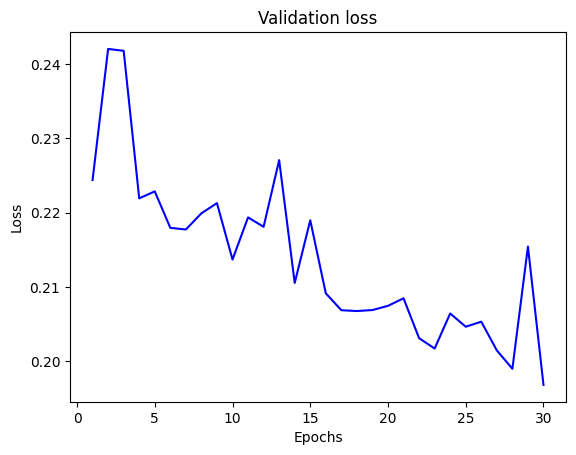

In [ ]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
epochs = range(1, len(val_loss) + 1)
plt.title("Validation loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()